In [66]:
import numpy as np
import sympy as sp

A = np.array([[2, 0, 0],[0, 3, 0], [0, 0, 5]])
s = 5

print(f'Eigenvalues are {np.linalg.eigvals(A)}')

x0 = np.array([[1],[1], [1]])
C = np.ones((1,3))
Cdiag = np.kron(np.eye(s), C)


H = Cdiag @ np.vstack((np.eye(3), A, A @ A, A @ A @ A, A@A@A@A)) @ np.hstack((x0, A @ x0, A @ A @ x0, A @ A @ A @ x0))

print(H)

Hover = H[1:,:]
Hunder = H[:-1,:]

Phi = sp.Matrix(np.linalg.pinv(Hunder, rcond=1e-6) @ Hover)
print(Phi)
print(Phi.rank())
print(Phi.rref(iszerofunc=lambda x:sp.comp(x,0,1e-6)))
print(Phi.eigenvals())

Eigenvalues are [2. 3. 5.]
[[3.0000e+00 1.0000e+01 3.8000e+01 1.6000e+02]
 [1.0000e+01 3.8000e+01 1.6000e+02 7.2200e+02]
 [3.8000e+01 1.6000e+02 7.2200e+02 3.4000e+03]
 [1.6000e+02 7.2200e+02 3.4000e+03 1.6418e+04]
 [7.2200e+02 3.4000e+03 1.6418e+04 8.0440e+04]]
Matrix([[0.474006116207877, -0.152905198778078, 0.0152905198711947, 19.1131498470698], [0.510193679918188, 0.158002038735076, -0.0158002038788320, 10.2497451579688], [0.158002038736184, 0.949031600408597, 0.00509683996412713, -24.6289500509431], [-0.0158002038736235, 0.00509683995909016, 0.999490316003336, 9.36289500509294]])
4
(Matrix([
[1, 0, 0,  29.9999999999987],
[0, 1, 0, -31.0000000000034],
[0, 0, 1,  10.0000000000001],
[0, 0, 0,                 0]]), (0, 1, 2))
{-1.88438855639558e-14 - 2.31172115397588e-65*I: 1, 4.99999999999891 + 1.66669682767876e-63*I: 1, 1.99999999999938 - 3.23151779080931e-64*I: 1, 3.00000000000174 + 1.46607451798862e-63*I: 1}


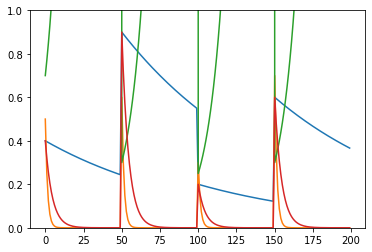

In [9]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
N_t = 4
N_g = 4
Lambdas = np.array([0.99, 0.5, 1.1, 0.8])
L = np.vander(Lambdas, N, increasing=True).T
G = np.array([[0.4, 0.9, 0.2, 0.6], [0.5, 0.6, 0.3, 0.7], [0.7, 0.3, 0.25, 0.3], [0.4, 0.9, 0.2, 0.6]])

G_ev = np.empty((N_g, N*N_t))
for i in range(N_g):
    G_ev[i,...] = np.outer(L[:,i], G[i,:]).T.flatten()
    

plt.plot(G_ev.T)
plt.ylim([0,1])
plt.show()